In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path= '/Users/y1u0d2/Desktop/Lab/result/sf/merge_base/merge_O-O.csv'

df = pd.read_csv(csv_path)
descriptor_labels = []
for column in df.columns:
    if 'sf_' in column:
        descriptor_labels.append(column)
target_label ='E_atom'
Xraw = df.loc[:, descriptor_labels].values
y = df.loc[:, target_label].values

In [22]:
from sklearn.preprocessing import StandardScaler
if True:
    scaler = StandardScaler()
    scaler.fit(Xraw)
    X = scaler.transform(Xraw)
else:
    X = Xraw



In [23]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


def linear_regression_CV_score(X, y, n_splits=10, random_state=1):
    """linear regression with cross validation sore

    Args:
        X (np.array): descriptor
        y (np.array): target variable
        n_splits (int, optional): the number of splits in CV. Defaults to 10.
        random_state (int, optional): random state in KFold(). Defaults to 1.

    Returns:
        float: the mean value of the CV score
        float: the stddev value of the CV score
    """
    reg = LinearRegression()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    test_score_list = []
    for train, test in kf.split(X):
        Xtrain, ytrain = X[train], y[train]
        Xtest, ytest = X[test], y[test]
        reg.fit(Xtrain, ytrain)

        test_score = reg.score(Xtest, ytest)
        test_score_list.append(test_score)

    return np.mean(test_score_list), np.std(test_score_list)


linear_regression_CV_score(X, y)


(0.21225924172407643, 0.030557738298689744)

In [24]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


def linear_regression_CV_score_ytestp(X, y, n_splits=10, random_state=1):
    """linear regression with cross validation sore.
        It also returns y_test and y_test^predict

    Args:
        X (np.array): descriptor
        y (np.array): target variable
        n_splits (int, optional): the number of splits in CV. Defaults to 10.
        random_state (int, optional): random state in KFold(). Defaults to 1.

    Returns:
        float: the mean value of the CV score
        float: the stddev value of the CV score
        list: a list of y_test
        list: a list of y_test^predict
    """
    reg = LinearRegression()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    test_score_list = []
    ytest_list = []
    ytestp_list = []
    for train, test in kf.split(X):
        Xtrain, ytrain = X[train], y[train]
        Xtest, ytest = X[test], y[test]
        reg.fit(Xtrain, ytrain)

        ytestp = reg.predict(Xtest)
        ytest_list.extend(ytest)
        ytestp_list.extend(ytestp)

        test_score = r2_score(ytest, ytestp)
        test_score_list.append(test_score)

    return np.mean(test_score_list), np.std(test_score_list), ytest_list, ytestp_list


test_score_mean, test_score_std, ytest_list, ytestp_list = linear_regression_CV_score_ytestp(
    X, y)

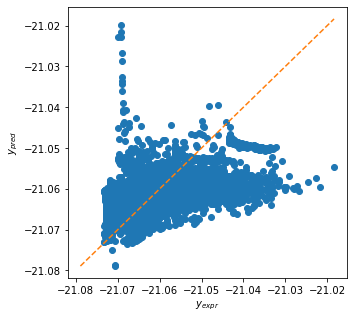

In [25]:
plt.figure(figsize=(5, 5))
plt.plot(ytest_list, ytestp_list, "o")
yall = np.hstack([ytest_list, ytestp_list])

ylim = yall.min(), yall.max()
plt.plot(ylim, ylim, "--")

plt.xlabel("$y_{expr}$")
plt.ylabel("$y_{pred}$")
plt.show()

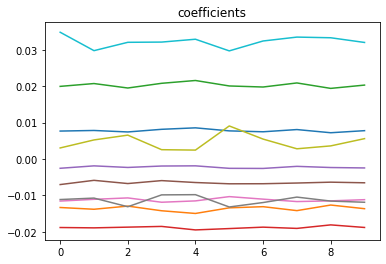

In [26]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


def linear_regression_CV_coef(X, y, n_splits=10, random_state=1):
    """linear regression with cross validation

    Args:
        X (np.array): descriptor
        y (np.array): target variable
        n_splits (int, optional): the number of splits in CV. Defaults to 10.
        random_state (int, optional): random state in KFold(). Defaults to 1.

    Returns:
        list: a list of linear coefficients
    """
    reg = LinearRegression()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    coef_list = []
    for train, test in kf.split(X):
        Xtrain, ytrain = X[train], y[train]
        Xtest, ytest = X[test], y[test]
        reg.fit(Xtrain, ytrain)
        coef_list.append(list(reg.coef_.ravel()))
    return coef_list


coef_list = linear_regression_CV_coef(X, y)
plt.title("coefficients")
img = plt.plot(coef_list)